In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import find_peaks

In [2]:
# Capstone guidelines: https://bcourses.berkeley.edu/courses/1532916/pages/capstone-project-2?module_item_id=17001677

In [3]:
# load data
def file_name_voltage(number):
    return f"resources/data/{number}_voltage.csv"

def file_name_B_field(number):
    return f"resources/data/{number}_B_field.csv"

data0_1_table = np.genfromtxt(file_name_voltage(0.1), delimiter=',', skip_header=1)
data0_1= {
    "time": data0_1_table[:, 0],        # time, s
    "voltage": data0_1_table[:, 1],     # voltage, V
}

data0_2_table = np.genfromtxt(file_name_voltage(0.2), delimiter=',', skip_header=1)
data0_2= {
    "time": data0_2_table[:, 0],        # time, s
    "voltage": data0_2_table[:, 1],     # voltage, V
}

data1_1_B_table = np.genfromtxt(file_name_B_field(1.1), delimiter=',', skip_header=1)
data1_1_B= {
    "time": data1_1_B_table[:,0], # time, s
    "Bx": data1_1_B_table[:,1],   # Bx (µT)
    "By": data1_1_B_table[:,2],   # By (µT)
    "Bz": data1_1_B_table[:,3],   # Bz (µT)
}

data1_1_v_table = np.genfromtxt(file_name_voltage(1.1), delimiter=',', skip_header=1)
data1_1_v= {
    "time": data1_1_v_table[:, 0],        # time, s
    "voltage": data1_1_v_table[:, 1],     # voltage, V
}

data2_1_B_table = np.genfromtxt(file_name_B_field(2.1), delimiter=',', skip_header=1)
data2_1_B = {
    "time": data2_1_B_table[:, 0],  # time, s
    "Bx": data2_1_B_table[:, 1],    # Bx (µT)
    "By": data2_1_B_table[:, 2],    # By (µT)
    "Bz": data2_1_B_table[:, 3],    # Bz (µT)
}

data2_1_v_table = np.genfromtxt(file_name_voltage(2.1), delimiter=',', skip_header=1)
data2_1_v = {
    "time": data2_1_v_table[:, 0],        # time, s
    "voltage": data2_1_v_table[:, 1],     # voltage, V
}

data2_2_B_table = np.genfromtxt(file_name_B_field(2.2), delimiter=',', skip_header=1)
data2_2_B = {
    "time": data2_2_B_table[:, 0],  # time, s
    "Bx": data2_2_B_table[:, 1],    # Bx (µT)
    "By": data2_2_B_table[:, 2],    # By (µT)
    "Bz": data2_2_B_table[:, 3],    # Bz (µT)
}

data2_2_v_table = np.genfromtxt(file_name_voltage(2.2), delimiter=',', skip_header=1)
data2_2_v = {
    "time": data2_2_v_table[:, 0],        # time, s
    "voltage": data2_2_v_table[:, 1],     # voltage, V
}

data2_3_B_table = np.genfromtxt(file_name_B_field(2.3), delimiter=',', skip_header=1)
data2_3_B = {
    "time": data2_3_B_table[:, 0],  # time, s
    "Bx": data2_3_B_table[:, 1],    # Bx (µT)
    "By": data2_3_B_table[:, 2],    # By (µT)
    "Bz": data2_3_B_table[:, 3],    # Bz (µT)
}

data2_3_v_table = np.genfromtxt(file_name_voltage(2.3), delimiter=',', skip_header=1)
data2_3_v = {
    "time": data2_3_v_table[:, 0],        # time, s
    "voltage": data2_3_v_table[:, 1],     # voltage, V
}

data2_4_B_table = np.genfromtxt(file_name_B_field(2.4), delimiter=',', skip_header=1)
data2_4_B = {
    "time": data2_4_B_table[:, 0],  # time, s
    "Bx": data2_4_B_table[:, 1],    # Bx (µT)
    "By": data2_4_B_table[:, 2],    # By (µT)
    "Bz": data2_4_B_table[:, 3],    # Bz (µT)
}

data2_4_v_table = np.genfromtxt(file_name_voltage(2.4), delimiter=',', skip_header=1)
data2_4_v = {
    "time": data2_4_v_table[:, 0],        # time, s
    "voltage": data2_4_v_table[:, 1],     # voltage, V
}

def get_data_slice(data, begin_second, end_second):
    if begin_second < 1/200: begin_second = 1/200
    return {key: value[int(begin_second*200-1):int(end_second*200-1)] for key, value in data.items()}

In [4]:
# plotting functions

def plot_magnetic_field(data_B, label):
    plt.plot(data_B["time"], data_B["Bx"], label="Bx " + label)
    plt.plot(data_B["time"], data_B["By"], label="By " + label)
    plt.plot(data_B["time"], data_B["Bz"], label="Bz " + label)

def plot_voltage(data_v, label):
    plt.plot(data_v["time"], data_v["voltage"], label="Voltage " + label)

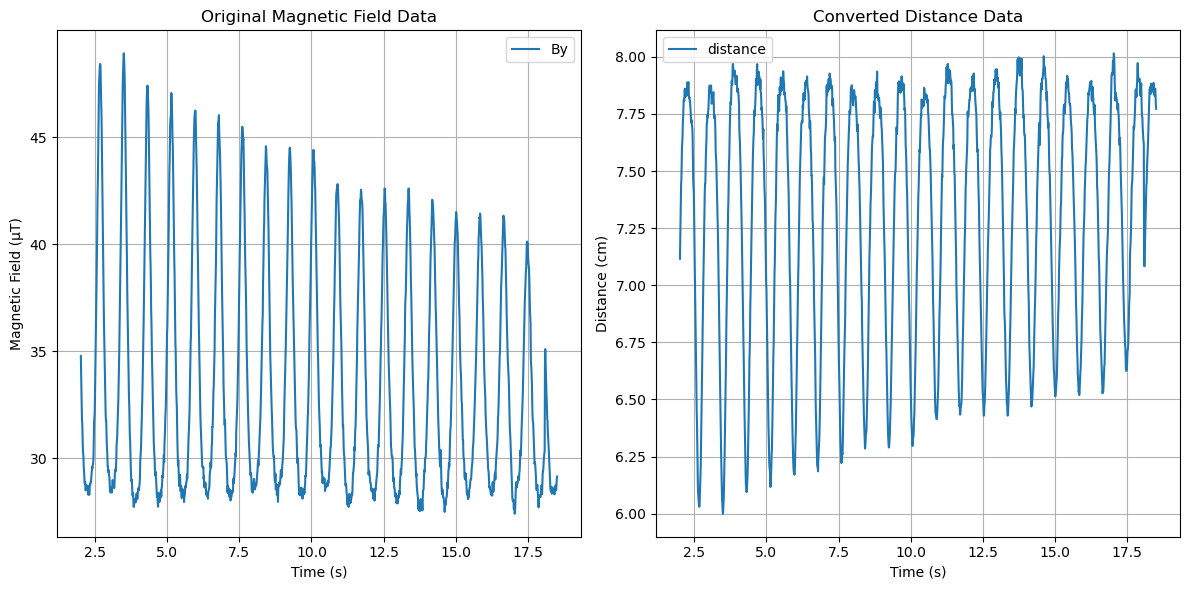

In [5]:
# utility

def convert_magnetic_field_to_distance(data):
    # B ~ 1/ r^2
    # r is 6 cm when B is max
    # convert B to distance
    distance = 6 / np.sqrt(data["By"]/np.max(data["By"]))
    return distance

def plot_magnetic_field_and_distance(data):
    # Plot original magnetic field data
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data["time"], data["By"], label="By")
    plt.xlabel('Time (s)')
    plt.ylabel('Magnetic Field (µT)')
    plt.title('Original Magnetic Field Data')
    plt.legend()
    plt.grid(True)

    # Convert magnetic field data to distance and plot
    distance = convert_magnetic_field_to_distance(data)
    plt.subplot(1, 2, 2)
    plt.plot(data["time"], distance, label="distance")
    plt.xlabel('Time (s)')
    plt.ylabel('Distance (cm)')
    plt.title('Converted Distance Data')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the data
data = get_data_slice(data2_3_B, 1, 30)
plot_magnetic_field_and_distance(data)
    

In [6]:
# part 0: calibration

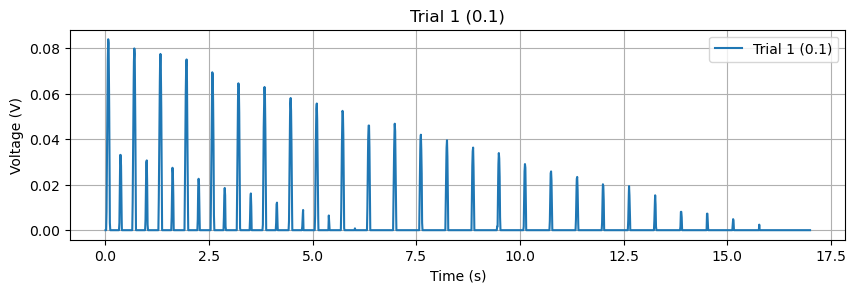

In [7]:
'''
110 grams plus magnet moving on spring (magnet = .013 g)
2 trials done - capstone test in Theo cloud (0.1, 0.2)
only induced voltage recorded
just using 1 magnet
P0T1.jpg
'''
def part_0_t_1():
    sliced_data0_1 = get_data_slice(data0_1, 0, 17)
    sliced_data0_2 = get_data_slice(data0_2, 2, 30)
    
    plt.figure(figsize=(10, 6))
    
    # Plot for trial 1 (0.1)
    plt.subplot(2, 1, 1)
    plt.plot(sliced_data0_1["time"], sliced_data0_1["voltage"], label="Trial 1 (0.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Trial 1 (0.1)')
    plt.legend()
    plt.grid(True)
    
    # # Plot for trial 2 (0.2) - NOT AS GOOD, USE TRIAL 1
    # plt.subplot(2, 1, 2)
    # plt.plot(sliced_data0_2["time"], sliced_data0_2["voltage"], label="Trial 2 (0.2)")
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.title('Trial 2 (0.2)')
    # plt.legend()
    # plt.grid(True)
    
    # plt.tight_layout()
    # plt.show()

# Call the function to plot the sliced data
part_0_t_1()

In [8]:
# part 1: analyze data for original solonoid, showing that the physics works for each variable change

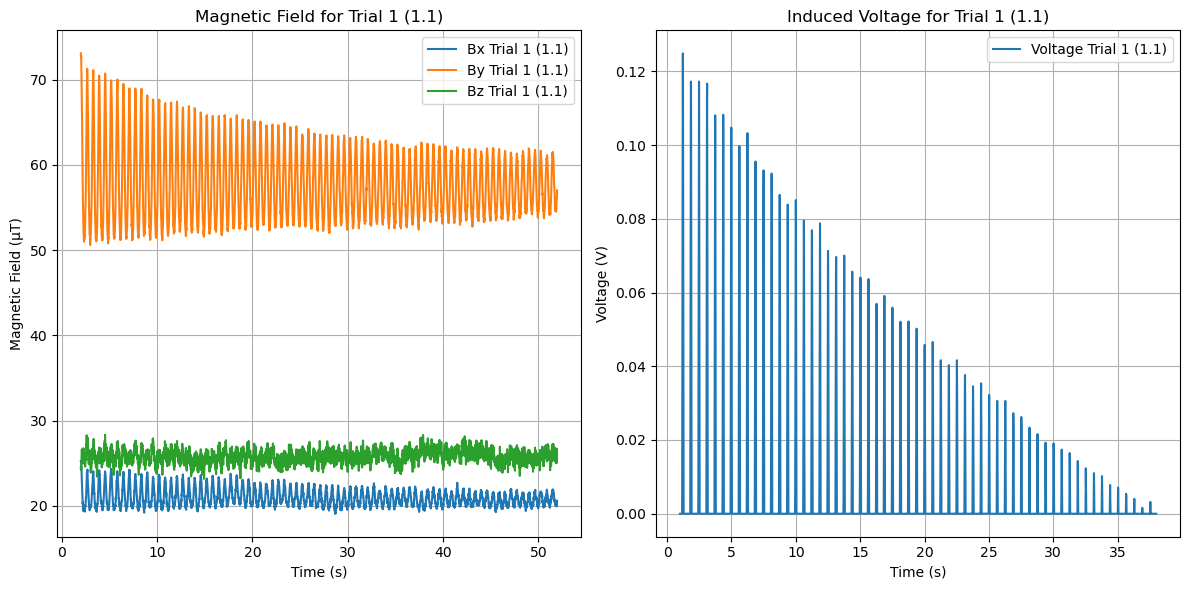

In [9]:
'''
Trial 1
110 grams plus magnet moving on spring (magnet = .013 g)
now figuring out best way to measure displacement - putting Iolab over magnet and measuring magnetometer which is proportional to displacement
Displacement in will cloud, induced voltage in Theo
1.1
P1T1.jpg
'''
def part_1_t_1():
    sliced_data1_1_B = get_data_slice(data1_1_B, 1, 38)
    sliced_data1_1_v = get_data_slice(data1_1_v, 1, 38)
    
    plt.figure(figsize=(12, 6))

    # Plot magnetic field data
    plt.subplot(1, 2, 1)
    plot_magnetic_field(sliced_data1_1_B, "Trial 1 (1.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Magnetic Field (µT)')
    plt.title('Magnetic Field for Trial 1 (1.1)')
    plt.legend()
    plt.grid(True)

    # Plot induced voltage data
    plt.subplot(1, 2, 2)
    plot_voltage(sliced_data1_1_v, "Trial 1 (1.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 1 (1.1)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data
part_1_t_1()

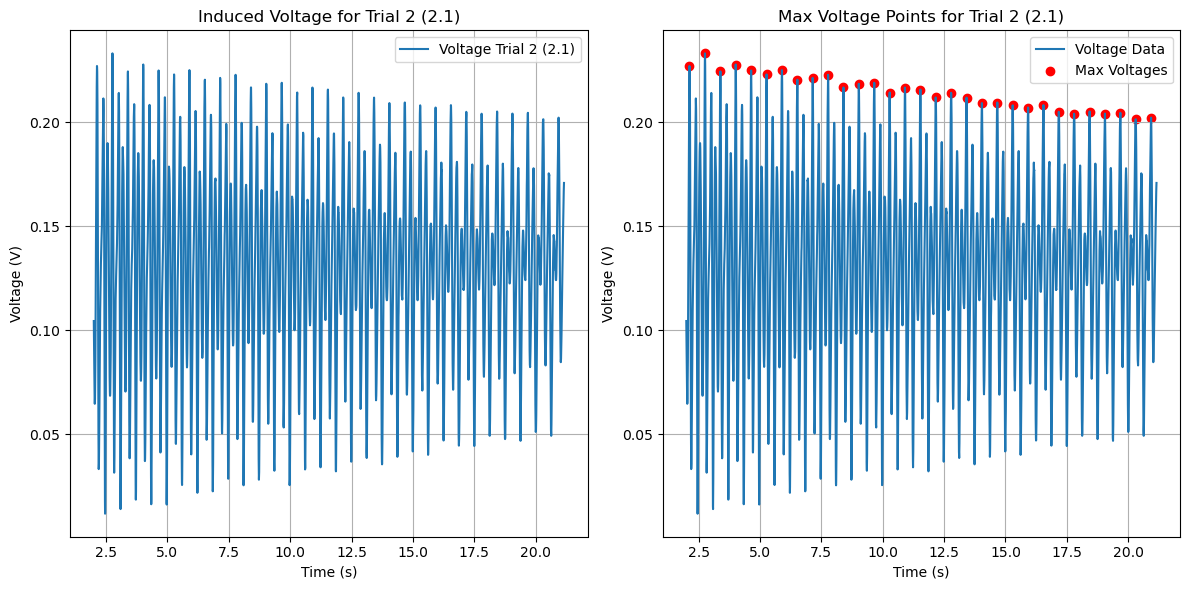

In [27]:
'''
Trial 2
2 solenoids
110 grams plus magnet moving on spring (magnet = .013 g)
Displacement in will cloud, induced voltage in Theo
2.1
P1T2.jpg
'''
def part_1_t_2():
    sliced_data2_1_B = get_data_slice(data2_1_B, 2, data2_1_B["time"][-1])
    sliced_data2_1_v = get_data_slice(data2_1_v, 2, data2_1_v["time"][-1])
    
    plt.figure(figsize=(12, 6))

    # Plot induced voltage data
    plt.subplot(1, 2, 1)
    plot_voltage(sliced_data2_1_v, "Trial 2 (2.1)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 2 (2.1)')
    plt.legend()
    plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_1_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = sliced_data2_1_v["time"][peaks]
    max_voltages = sliced_data2_1_v["voltage"][peaks]

    plt.subplot(1, 2, 2)
    plt.plot(sliced_data2_1_v["time"], sliced_data2_1_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 2 (2.1)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data with max values
part_1_t_2()

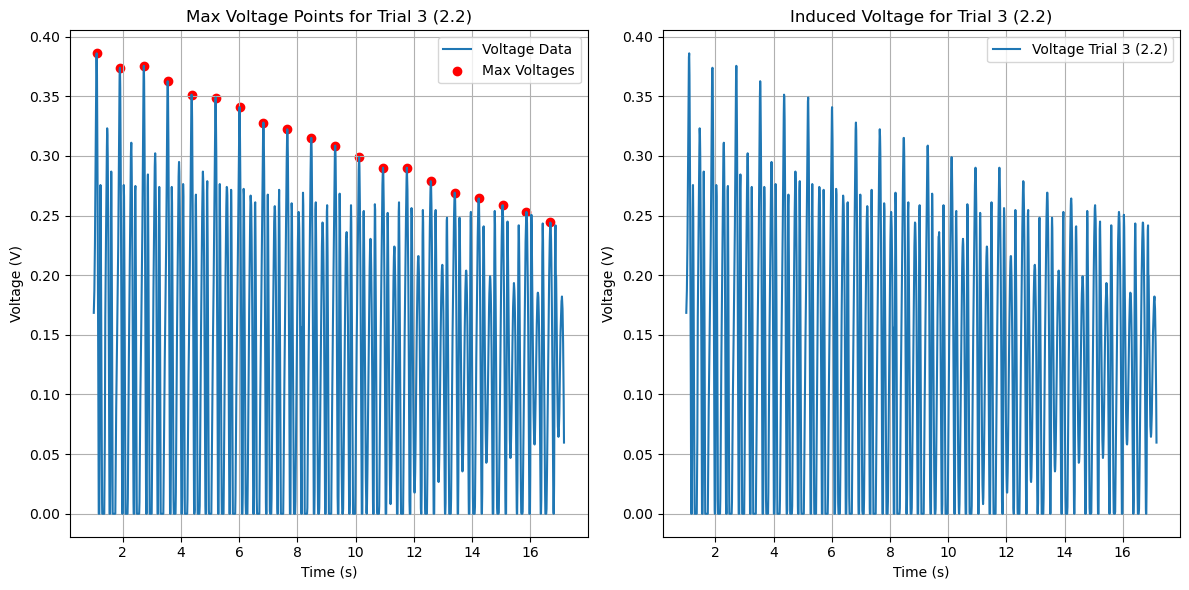

In [29]:
'''
Trial 3
same as trial 2, but moved the iolab up so no longer starts in solonoid
2.2
P1T3_4_5.jpg
'''
def part_1_t_3():
    sliced_data2_2_B = get_data_slice(data2_2_B, 1, data2_2_B["time"][-1])
    sliced_data2_2_v = get_data_slice(data2_2_v, 1, data2_2_v["time"][-1])
    
    plt.figure(figsize=(12, 6))

    # Plot induced voltage data
    plt.subplot(1, 2, 2)
    plot_voltage(sliced_data2_2_v, "Trial 3 (2.2)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 3 (2.2)')
    plt.legend()
    plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_2_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = sliced_data2_2_v["time"][peaks]
    max_voltages = sliced_data2_2_v["voltage"][peaks]

    plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_2_v["time"], sliced_data2_2_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 3 (2.2)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data with max values
part_1_t_3()

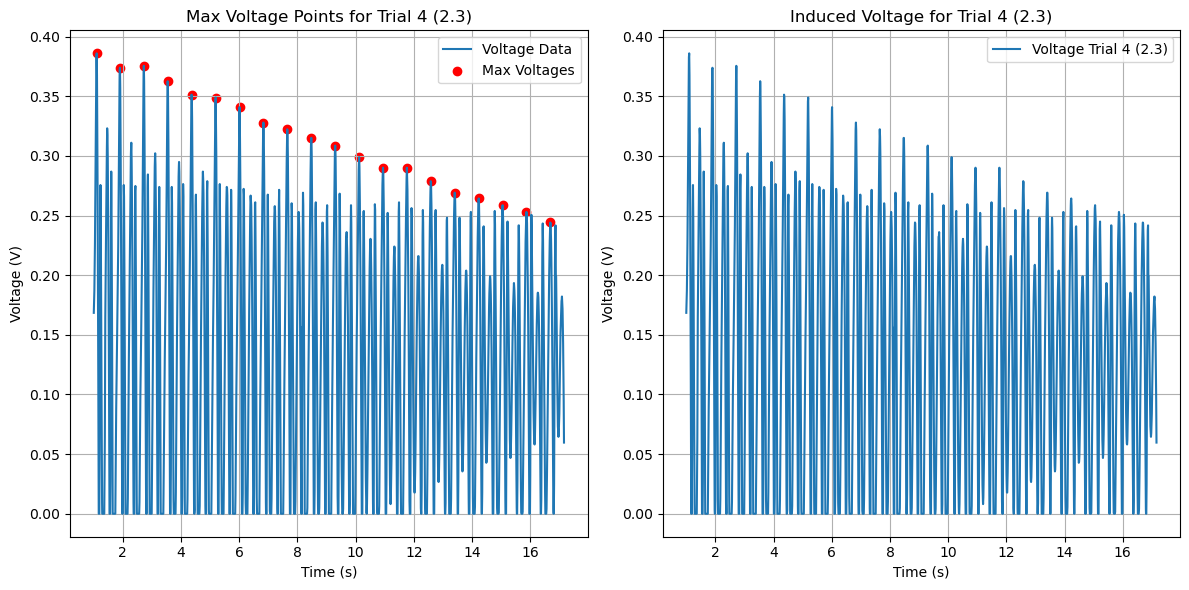

In [32]:
'''
Trial 4
Same as trial 3 but 230 grams plus magnet
2.3
P1T3_4_5.jpg
'''
def part_1_t_4():
    sliced_data2_3_B = get_data_slice(data2_3_B, 1, data2_3_B["time"][-1])
    sliced_data2_3_v = get_data_slice(data2_3_v, 1, data2_3_v["time"][-1])
    
    plt.figure(figsize=(12, 6))

    # Plot induced voltage data
    plt.subplot(1, 2, 2)
    plot_voltage(sliced_data2_3_v, "Trial 4 (2.3)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 4 (2.3)')
    plt.legend()
    plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_3_v["voltage"], distance=100)  # Adjust the distance as needed
    max_times = sliced_data2_3_v["time"][peaks]
    max_voltages = sliced_data2_3_v["voltage"][peaks]

    plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_3_v["time"], sliced_data2_3_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 4 (2.3)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data with max values
part_1_t_4()

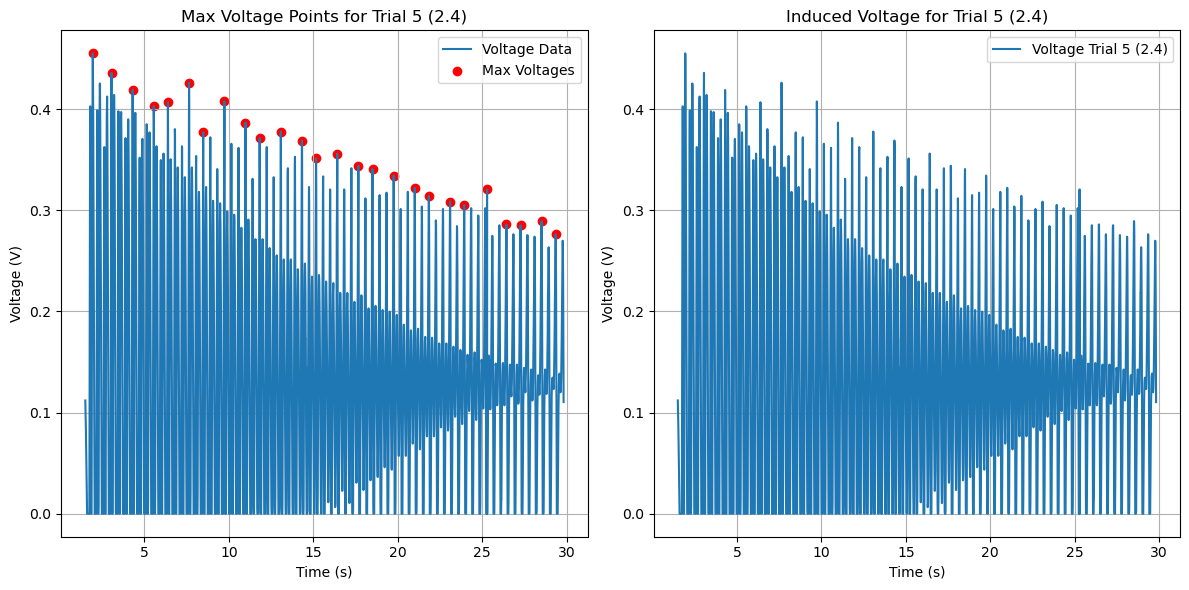

In [38]:
'''
Trial 5
same as trial 4 but magnet strength = more (more magnets)
Using 2 magnets
2.4
P1T3_4_5.jpg
'''
def part_1_t_5():
    sliced_data2_4_B = get_data_slice(data2_4_B, 1.5, data2_4_B["time"][-1])
    sliced_data2_4_v = get_data_slice(data2_4_v, 1.5, data2_4_v["time"][-1])
    
    plt.figure(figsize=(12, 6))

    # Plot induced voltage data
    plt.subplot(1, 2, 2)
    plot_voltage(sliced_data2_4_v, "Trial 5 (2.4)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Induced Voltage for Trial 5 (2.4)')
    plt.legend()
    plt.grid(True)

    # Find and plot maximum points
    peaks, _ = find_peaks(sliced_data2_4_v["voltage"], distance=125)  # Adjust the distance as needed
    max_times = sliced_data2_4_v["time"][peaks]
    max_voltages = sliced_data2_4_v["voltage"][peaks]

    plt.subplot(1, 2, 1)
    plt.plot(sliced_data2_4_v["time"], sliced_data2_4_v["voltage"], label='Voltage Data')
    plt.scatter(max_times, max_voltages, color='red', label='Max Voltages')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Max Voltage Points for Trial 5 (2.4)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data with max values
part_1_t_5()

In [14]:
#: part 2 - create 2 solenoids, different radii - show emf is proportional to radius squared
# one using gatorade bottle, other using mints jar
# 3.1 is WCT, 4.1 is gatorade

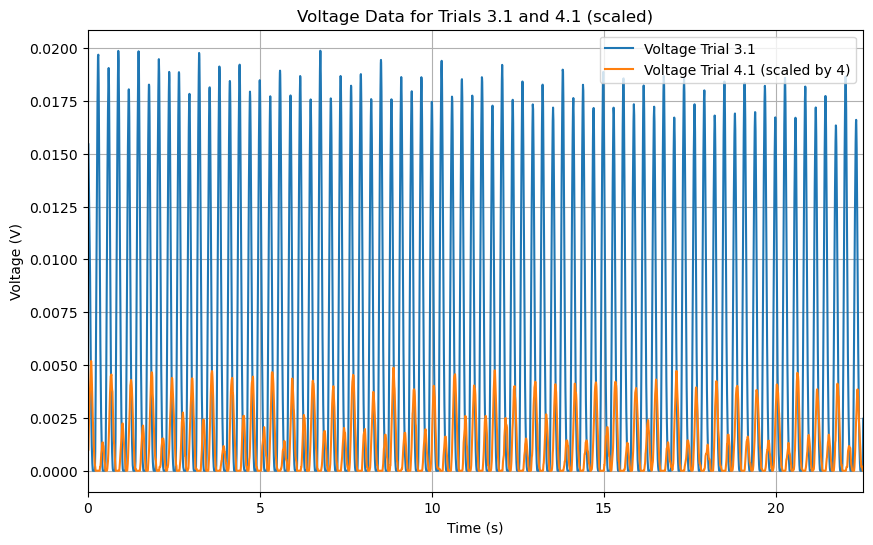

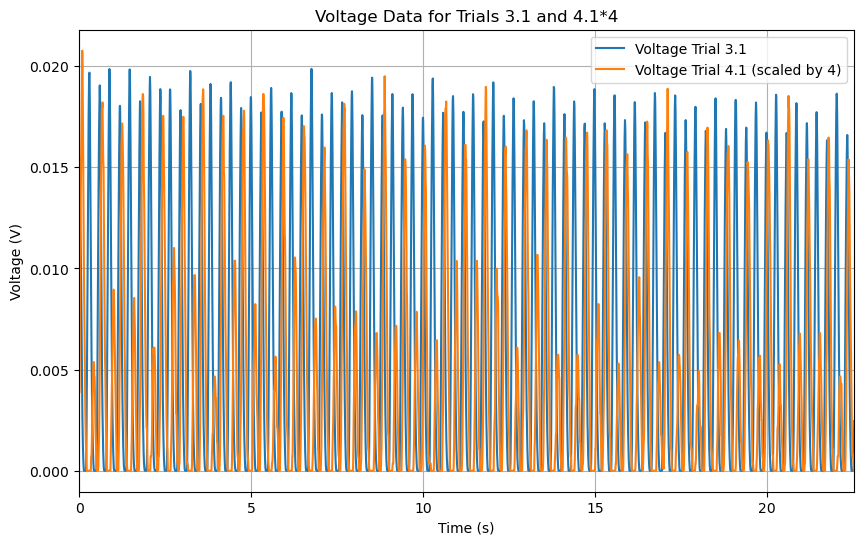

In [49]:
data3_1_v_table = np.genfromtxt(file_name_voltage(3.1), delimiter=',', skip_header=1)
data3_1_v= {
    "time": data3_1_v_table[:, 0],        # time, s
    "voltage": data3_1_v_table[:, 1],     # voltage, V
}

data4_1_v_table = np.genfromtxt(file_name_voltage(4.1), delimiter=',', skip_header=1)
data4_1_v= {
    "time": data4_1_v_table[:, 0],        # time, s
    "voltage": data4_1_v_table[:, 1],     # voltage, V
}

def part_2():
    plt.figure(figsize=(10, 6))

    # Plot voltage data for Trial 3.1
    plot_voltage(data3_1_v, "Trial 3.1")

    # Plot voltage data for Trial 4.1 (scaled by 4)
    plot_voltage(data4_1_v, "Trial 4.1 (scaled by 4)")

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trials 3.1 and 4.1 (scaled)')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, max(data4_1_v["time"]))  # Set x-axis limit from 0 to the end of Trial 4.1
    plt.show()

    plt.figure(figsize=(10, 6))

    # Plot voltage data for Trial 3.1
    plot_voltage(data3_1_v, "Trial 3.1")

    # Plot voltage data for Trial 4.1 (scaled by 4)
    scaled_data4_1_v = data4_1_v.copy()  # Make a copy of the data
    scaled_data4_1_v["voltage"] *= 4  # Scale the voltage by 4
    plot_voltage(scaled_data4_1_v, "Trial 4.1 (scaled by 4)")

    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trials 3.1 and 4.1*4')
    plt.legend()
    plt.grid(True)
    plt.xlim(0, max(data4_1_v["time"]))  # Set x-axis limit from 0 to the end of Trial 4.1
    plt.show()

# Call the function to plot the voltage data for both cases
part_2()

In [16]:
# part 3: add a iron core (some ferromagnetic material) to the bottom half of the solenoid, increase self-inductance
# emf = L * di/dt

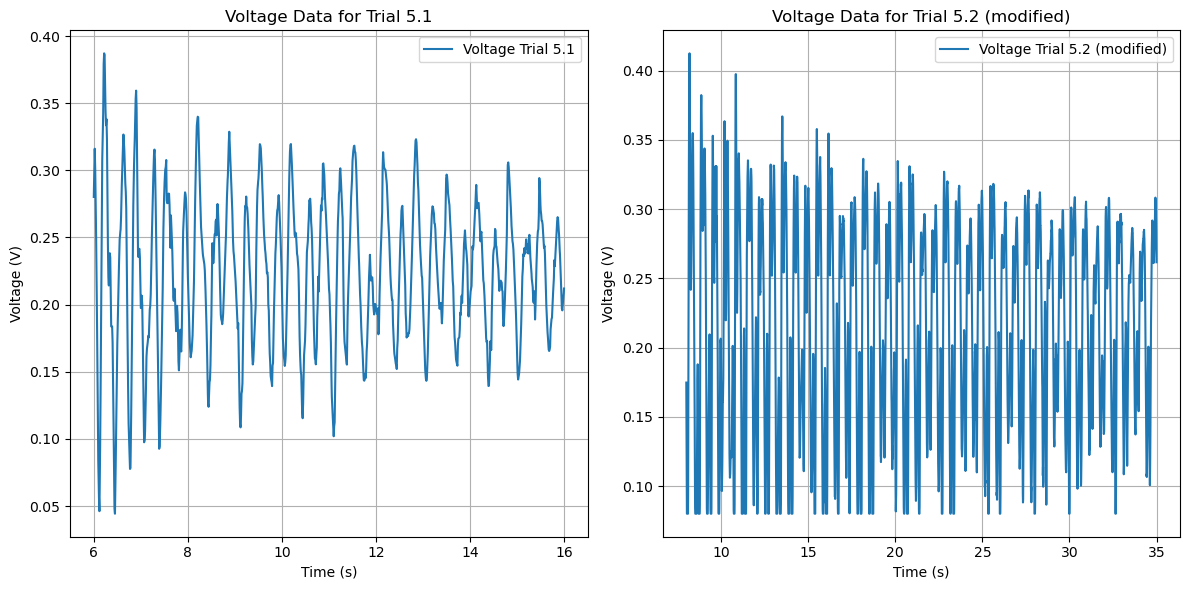

In [17]:
data5_1_v_table = np.genfromtxt(file_name_voltage(5.1), delimiter=',', skip_header=1)
data5_1_v= {
    "time": data5_1_v_table[:, 0],        # time, s
    "voltage": data5_1_v_table[:, 1],     # voltage, V
}

data5_2_v_table = np.genfromtxt(file_name_voltage(5.2), delimiter=',', skip_header=1)
data5_2_v= {
    "time": data5_2_v_table[:, 0],        # time, s
    "voltage": data5_2_v_table[:, 1],     # voltage, V
}

def part_3():
    # Get sliced data for Trial 5.1
    sliced_data5_1_v = get_data_slice(data5_1_v, 6, 16)
    
    # Get sliced data for Trial 5.2 and add 0.1 to the voltage
    sliced_data5_2_v = get_data_slice(data5_2_v, 8, 35)
    modified_sliced_data5_2_v = sliced_data5_2_v.copy()
    modified_sliced_data5_2_v["voltage"] += 0.08
    
    # Plot both voltage data next to each other
    plt.figure(figsize=(12, 6))

    # Plot voltage data for Trial 5.1
    plt.subplot(1, 2, 1)
    plot_voltage(sliced_data5_1_v, "Trial 5.1")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trial 5.1')
    plt.legend()
    plt.grid(True)

    # Plot voltage data for Trial 5.2
    plt.subplot(1, 2, 2)
    plot_voltage(modified_sliced_data5_2_v, "Trial 5.2 (modified)")
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.title('Voltage Data for Trial 5.2 (modified)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot the sliced data
part_3()